# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Import datatime to convert from unix UTC time to readable time based on timezone
from datetime import datetime, timezone, timedelta

print(weather_api_key)

79b16ed188df002c353a4eb256c8fb74


### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL

url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"{city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.fromtimestamp(city_weather["dt"], 
                                           tz=timezone.utc).astimezone(
                                               timezone(timedelta(seconds=city_weather["timezone"]))).strftime(
                                                   '%d-%m-%Y') 
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | bamboo flat
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | talnakh
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | ust-nera
Processing Record 8 of Set 1 | valentin gomez farias
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | vilyuchinsk
Processing Record 12 of Set 1 | papatowai
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | sitka
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 18 of Set 1 | pemangkat
Processing Record 19 of Set 1 | tazacorte
Processing Record 20 of Set 1 | torteval
City not found. Skipping...
Proce

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# # Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,258.94,95,100,5.14,CA,04-02-2025
1,bamboo flat,11.7000,92.7167,299.20,83,1,1.03,IN,04-02-2025
2,blackmans bay,-43.0167,147.3167,286.22,80,7,0.45,AU,05-02-2025
3,talnakh,69.4865,88.3972,251.32,98,100,2.76,RU,05-02-2025
4,bredasdorp,-34.5322,20.0403,293.56,69,0,4.02,ZA,04-02-2025


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,258.94,95,100,5.14,CA,04-02-2025
1,bamboo flat,11.7000,92.7167,299.20,83,1,1.03,IN,04-02-2025
2,blackmans bay,-43.0167,147.3167,286.22,80,7,0.45,AU,05-02-2025
3,talnakh,69.4865,88.3972,251.32,98,100,2.76,RU,05-02-2025
4,bredasdorp,-34.5322,20.0403,293.56,69,0,4.02,ZA,04-02-2025


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

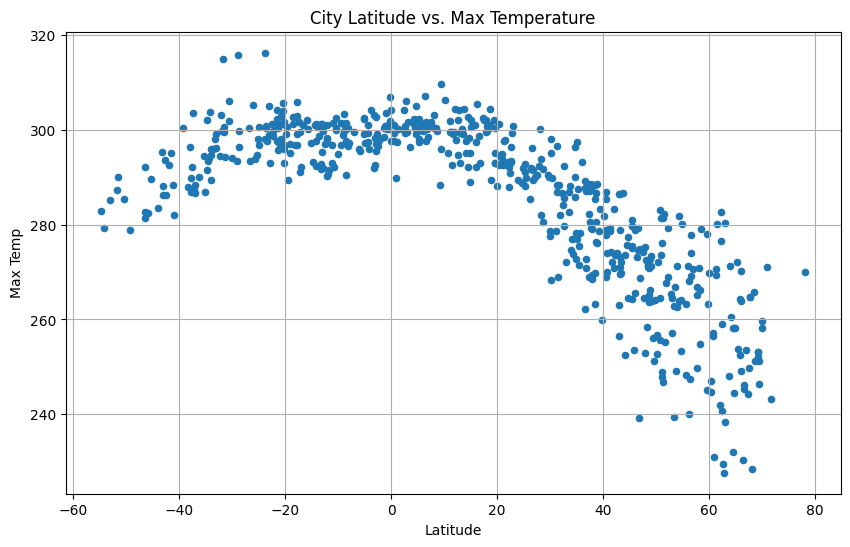

In [12]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", 
                       title="City Latitude vs. Max Temperature", grid=True, figsize=(10,6))

# Incorporate the other graph properties
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

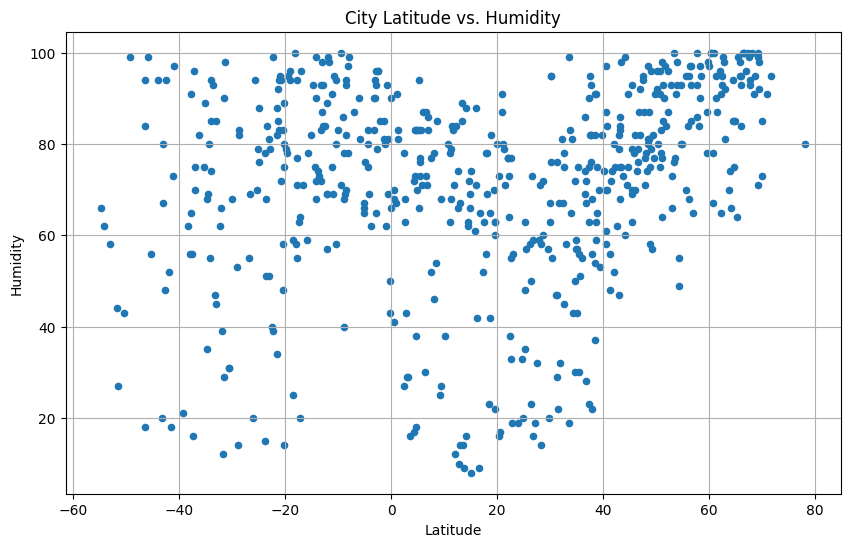

In [13]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", title="City Latitude vs. Humidity", grid=True, figsize=(10,6))


# Incorporate the other graph properties
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

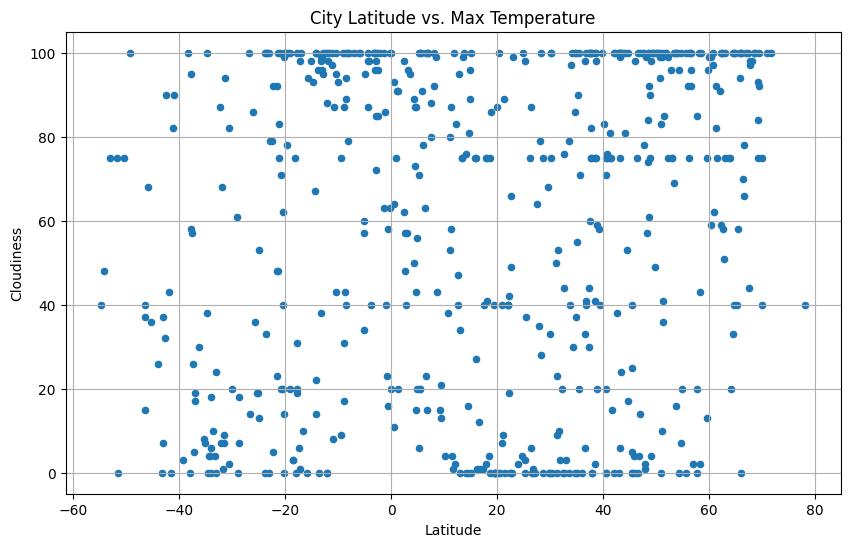

In [14]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", 
                       title="City Latitude vs. Max Temperature", grid=True, figsize=(10,6))


# Incorporate the other graph properties
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

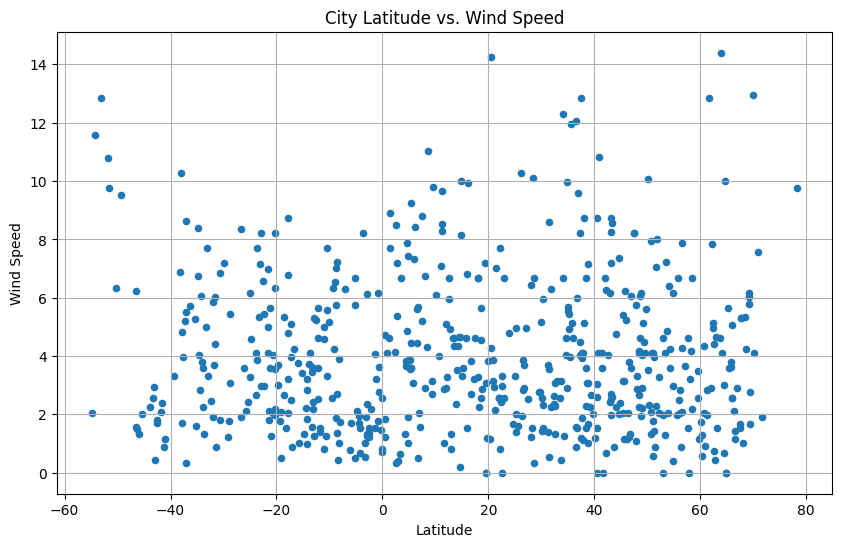

In [15]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", 
                       title="City Latitude vs. Wind Speed", grid=True, figsize=(10,6))

# Incorporate the other graph properties
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [56]:
def plot_linear_regression(x_values, y_values, y_label, hemisphere = "north"):
    # Calculate the regression line
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Create the regression line equation string
    line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
    
    # Create the scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot the regression line
    plt.plot(x_values, slope * x_values + intercept, 'r', label=line_eq)
    
    # Add the equation to the plot using plt.annotate
    plt.annotate(f'Linear Regression: {line_eq}\nR-squared = {r_value**2:.2f}',
                xy=(0.05, 0.95), xycoords='axes fraction',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.xlabel("Latitude")
    plt.ylabel(f"{y_label} {'' if (y_label != 'Wind Speed') else '(m/s)'}")
    plt.title(f"Latitude vs. {y_label} (in {'Northern' if hemisphere == 'north' else 'Southern'} Hemisphere)", pad=20)
    plt.legend()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,258.94,95,100,5.14,CA,04-02-2025
1,bamboo flat,11.7000,92.7167,299.20,83,1,1.03,IN,04-02-2025
3,talnakh,69.4865,88.3972,251.32,98,100,2.76,RU,05-02-2025
5,ust-nera,64.5667,143.2000,232.00,94,33,0.67,RU,05-02-2025
6,valentin gomez farias,28.2167,-106.5833,293.95,14,28,1.52,MX,04-02-2025


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,blackmans bay,-43.0167,147.3167,286.22,80,7,0.45,AU,05-02-2025
4,bredasdorp,-34.5322,20.0403,293.56,69,0,4.02,ZA,04-02-2025
7,puerto ayora,-0.7393,-90.3518,300.12,93,23,1.79,EC,04-02-2025
8,port-aux-francais,-49.3500,70.2167,278.88,99,100,9.51,TF,04-02-2025
10,papatowai,-46.5619,169.4708,282.76,84,40,1.56,NZ,05-02-2025


###  Temperature vs. Latitude Linear Regression Plot

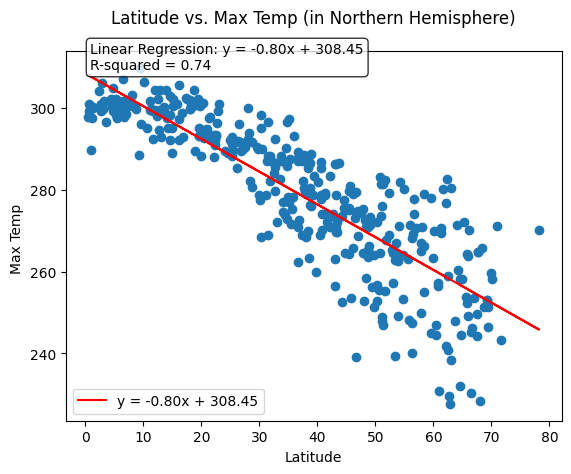

In [57]:
# Linear regression on Northern Hemisphere
north_latitude = northern_hemi_df['Lat']
north_max_temp = northern_hemi_df['Max Temp']
plot_linear_regression(north_latitude, north_max_temp, 'Max Temp')

plt.savefig("output_data/north_temp.png")
plt.show()

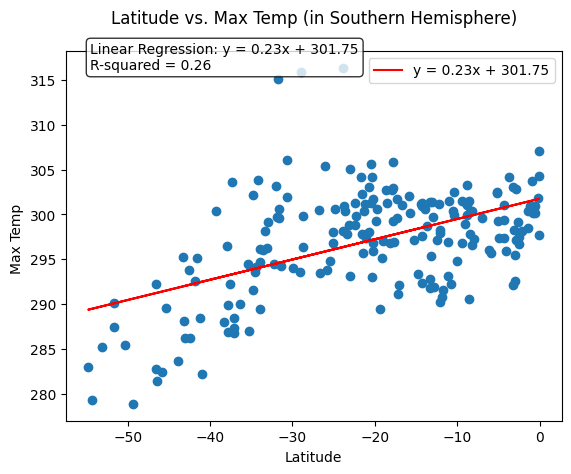

In [58]:
# Linear regression on Southern Hemisphere
south_latitude = southern_hemi_df['Lat']
south_max_temp = southern_hemi_df['Max Temp']
plot_linear_regression(south_latitude, south_max_temp, 'Max Temp', "south")

plt.savefig("output_data/south_temp.png")
plt.show()

**Discussion about the linear relationship:** 

These plots show that as latitude increases the maximum temperature decreases significantly. With the negative slope indicating a strong inverse relationship. This supports the expectation that as latitude gets closer to the North pole temperatures tend to be colder.

The plots also show that moving from the South pole toward the Equator temperatures tend to increase slightly. But the slope indicates a weak direct relationship, and the r^2 value suggests that other factors may be playing a role.

In both cases, temperatures tend to be warmer near the Equator.

### Humidity vs. Latitude Linear Regression Plot

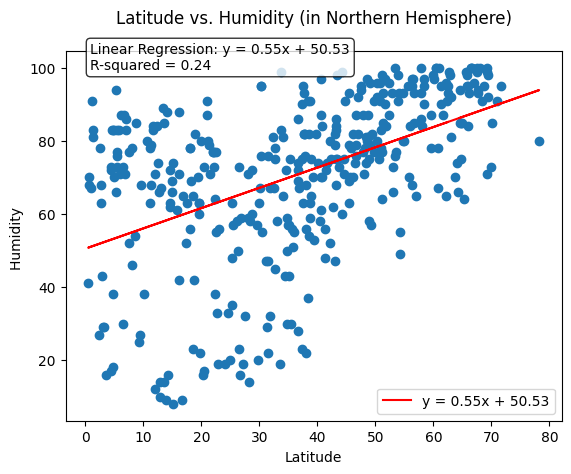

In [60]:
# Linear regression on Northern Hemisphere
north_humidity = northern_hemi_df['Humidity']
plot_linear_regression(north_latitude, north_humidity, 'Humidity')

plt.savefig("output_data/north_humidity.png")
plt.show()

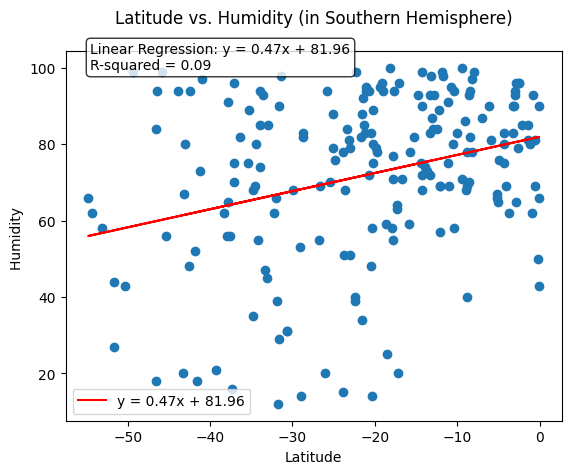

In [62]:
# Southern Hemisphere
south_humidity = southern_hemi_df['Humidity']
plot_linear_regression(south_latitude, south_humidity, 'Humidity', 'south')

plt.savefig("output_data/south_humidity.png")
plt.show()

**Discussion about the linear relationship:** 

The positive slope of the first chart suggests that as latitude increases moving toward the North Pole humidity tends to increase. But the r^2 value suggests that other suggests other factors may play a bigger role. The spread of the points in the plot imply a lot of variability.

The positive slope of the second chart suggests that as latitude increases moving toward the Equator humidity tends to increase slightly. The r^2 value is very low here suggesting that latitude is a weak predictor of humidity. The points here are also very spread out imply a lot of variability.

While the effect latitude has on humidity is more notieceable in the Northern Hemisphere, it seems to be weak overall.

### Cloudiness vs. Latitude Linear Regression Plot

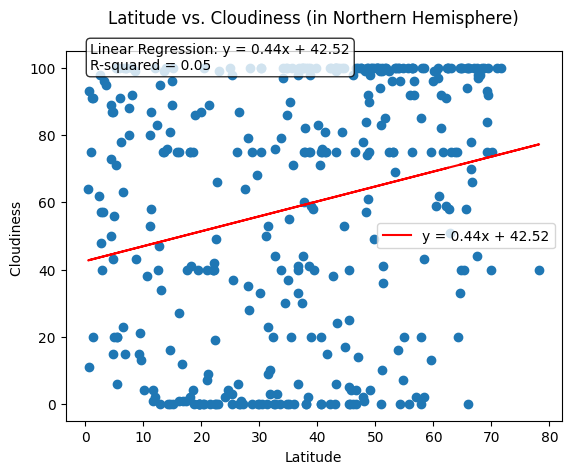

In [66]:
# Northern Hemisphere
north_cloudiness = northern_hemi_df['Cloudiness']
plot_linear_regression(north_latitude, north_cloudiness, 'Cloudiness')

plt.savefig("output_data/north_cloudiness.png")
plt.show()

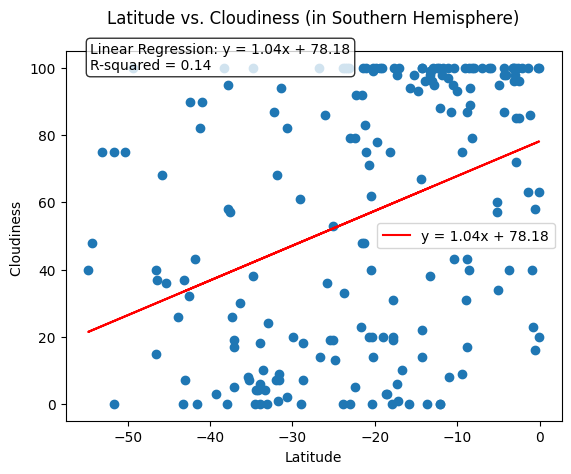

In [63]:
# Southern Hemisphere
south_cloudiness = southern_hemi_df['Cloudiness']
plot_linear_regression(south_latitude, south_cloudiness, 'Cloudiness', 'south')

plt.savefig("output_data/south_cloudiness.png")
plt.show()

**Discussion about the linear relationship:** 

The positive slope of the first chart suggests that as latitude increases moving toward the North Pole cloudiness tends to increase slightly. But the r^2 value suggests that there is almost no meaningful connection. The spread of the points suggests that cloudiness is highly random.

The positive slope of the second chart suggests that as latitude increases moving toward the Equator humidity tends to increase significantly. But the r^2 value is still very low, suggesting that this may be due to other factors than latitude. 

While there is a more noticeable trend in the Southern Hemisphere, cloudiness still appears to be a bit random, and latitude does not seem to be a strong indicator.

### Wind Speed vs. Latitude Linear Regression Plot

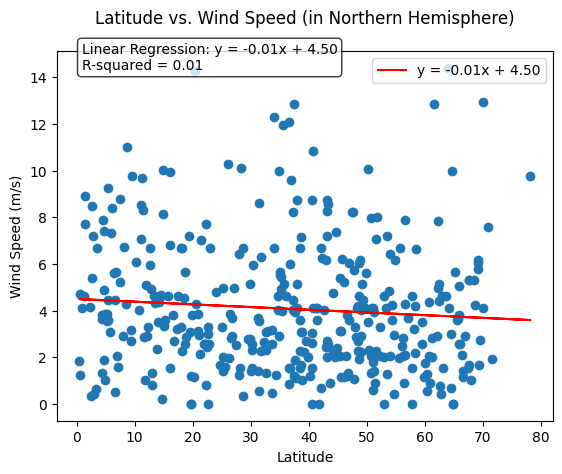

In [64]:
# Northern Hemisphere
north_wind = northern_hemi_df['Wind Speed']
plot_linear_regression(north_latitude, north_wind, 'Wind Speed')

plt.savefig("output_data/north_wind.png")
plt.show()

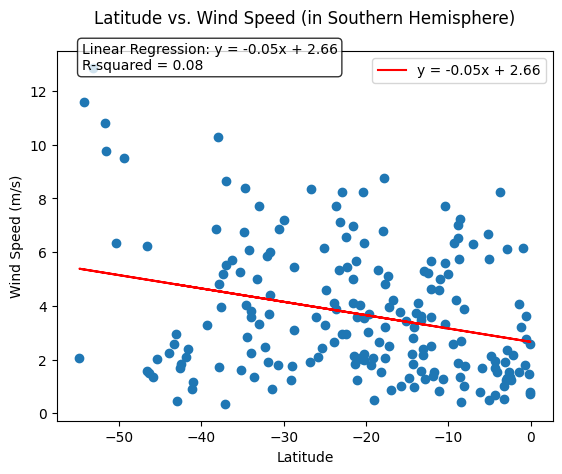

In [65]:
# Southern Hemisphere
south_wind = southern_hemi_df['Wind Speed']
plot_linear_regression(south_latitude, south_wind, 'Wind Speed', 'south')

plt.savefig("output_data/south_wind.png")
plt.show()

**Discussion about the linear relationship:** 

The first chart has almost no significant slope or r^2 value, and the scatter of points shows no clear trend

The slight negative slope of the second chart suggests that as latitude increases moving toward the Equator wind speed tends to decrease slightly. But the r^2 value is still very low, suggesting a weak relationship. 

These plots suggest a weak, or no relationship, between latitude and wind speed.